<a href="https://colab.research.google.com/github/suyog1234/suyog1234/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
training_set = pd.read_csv('/content/sample_data/Train_Titanic.csv')

In [52]:
training_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [54]:
Survived = training_set[training_set['Survived']==1]

In [55]:
No_Survived = training_set[training_set['Survived']==0]

In [56]:
print('Total = ',len(training_set))
print('Survived = ',len(Survived))
print('Not Survived = ',len(No_Survived))

Total =  891
Survived =  342
Not Survived =  549


In [57]:
print('% Survived = ',1.*len(Survived)/(len(training_set))*100)

% Survived =  38.38383838383838


In [58]:
print('% Not Survived = ',1.*len(No_Survived)/(len(training_set))*100)

% Not Survived =  61.61616161616161


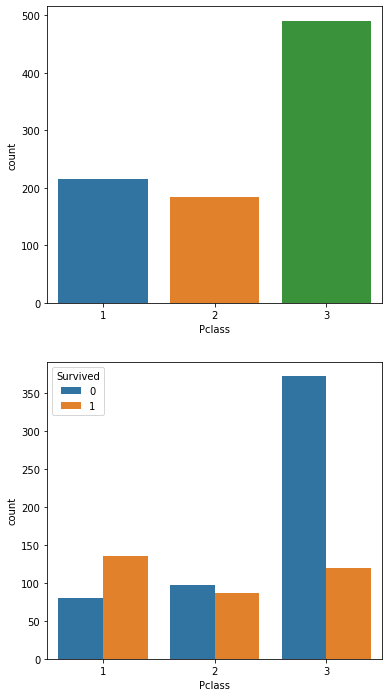

In [59]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Pclass',data=training_set)
plt.subplot(212)
sns.countplot(x='Pclass',hue='Survived',data=training_set)

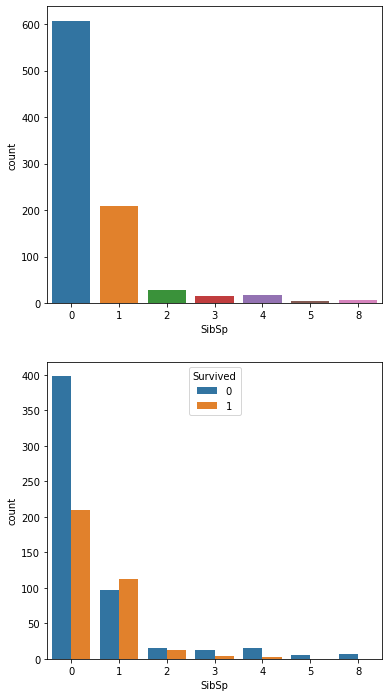

In [60]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='SibSp',data=training_set)
plt.subplot(212)
sns.countplot(x='SibSp',hue='Survived',data=training_set)

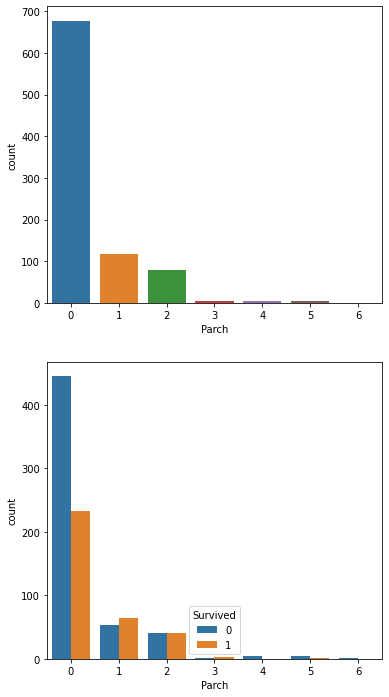

In [61]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Parch',data=training_set)
plt.subplot(212)
sns.countplot(x='Parch',hue='Survived',data=training_set)

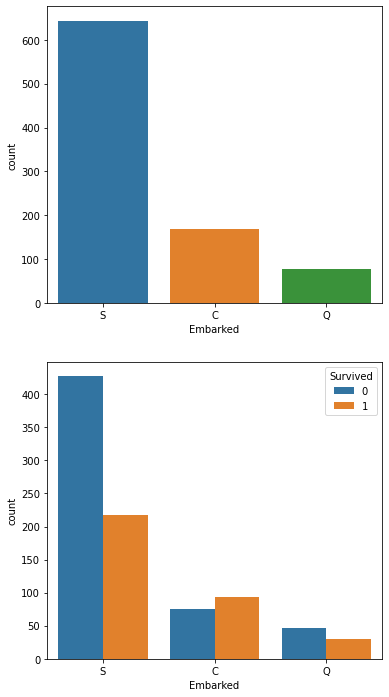

In [62]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Embarked',data=training_set)
plt.subplot(212)
sns.countplot(x='Embarked',hue='Survived',data=training_set)

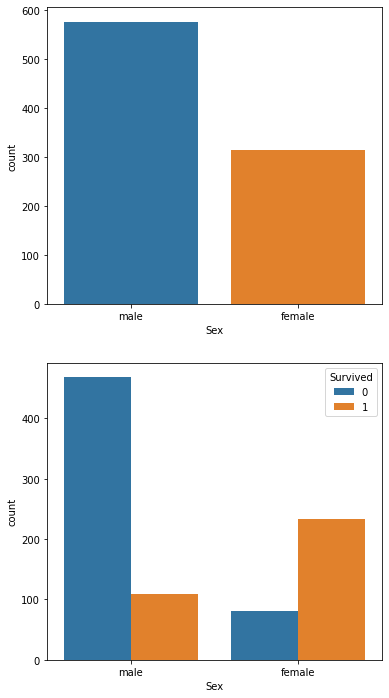

In [63]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Sex',data=training_set)
plt.subplot(212)
sns.countplot(x='Sex',hue='Survived',data=training_set)

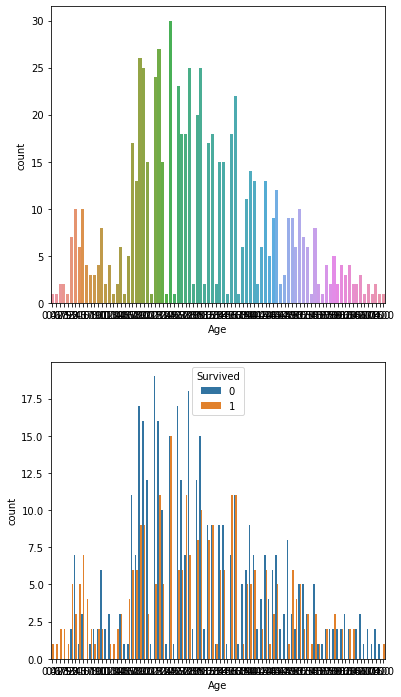

In [64]:
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x='Age',data=training_set)
plt.subplot(212)
sns.countplot(x='Age',hue='Survived',data=training_set)

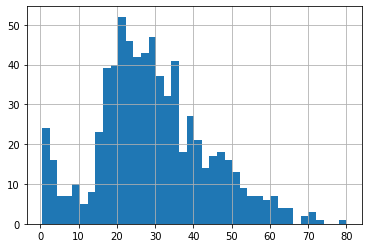

In [65]:
training_set['Age'].hist(bins=40)

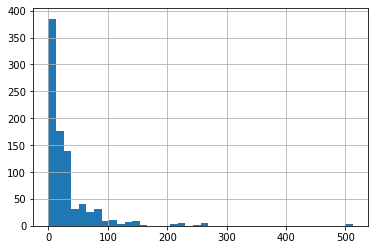

In [66]:
training_set['Fare'].hist(bins=40)

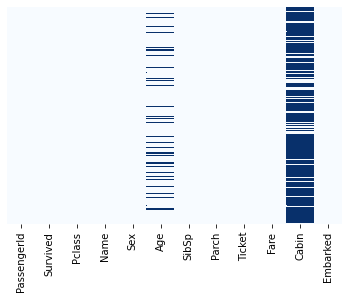

In [67]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [68]:
training_set.drop('Cabin',axis=1,inplace=True)

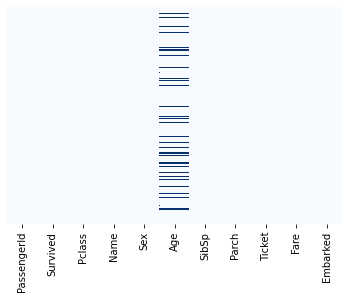

In [69]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [70]:
training_set.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

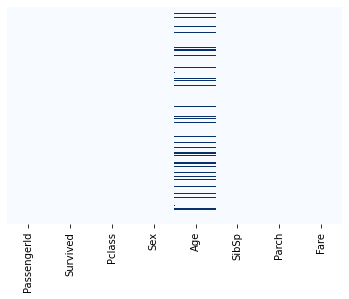

In [71]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

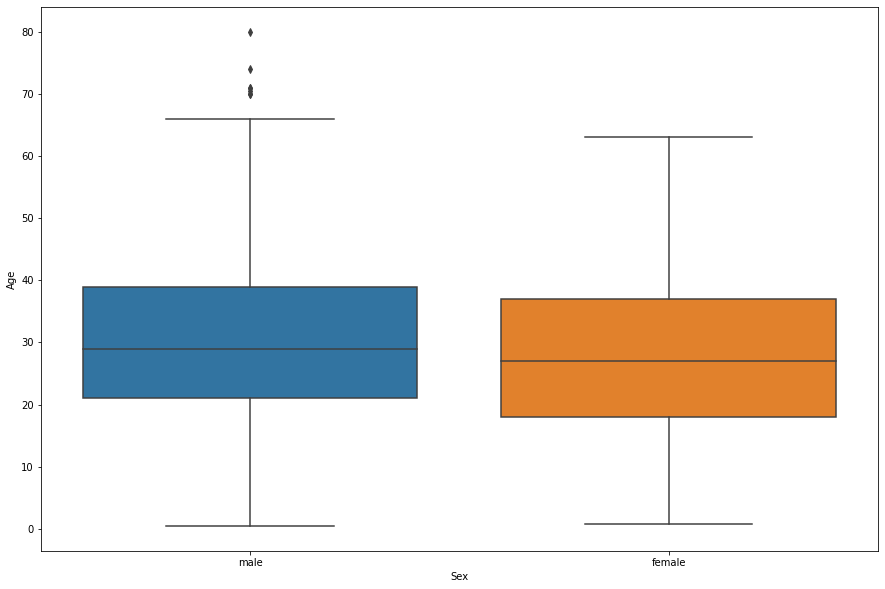

In [72]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex',y='Age',data=training_set)

In [73]:
def Fill_Age(data):
  age = data[0]
  sex = data[1]
  if pd.isnull(age):
    if sex is 'male':
      return 29
    else:
      return 25
  else:
    return age

In [74]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis=1)

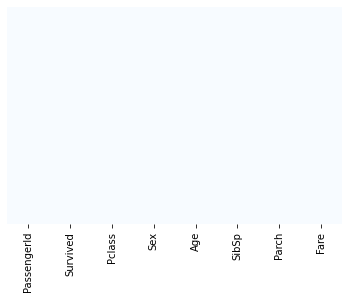

In [75]:
sns.heatmap(training_set.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [76]:
training_set

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,25.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


In [77]:
training_set.drop('PassengerId',axis=1,inplace=True)

In [78]:
training_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,25.0,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [79]:
male=pd.get_dummies(training_set['Sex'],drop_first=True)

In [80]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [81]:
training_set.drop(['Sex'],axis=1,inplace=True)

In [82]:
training_set = pd.concat([training_set,male],axis=1)

In [83]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [85]:
X = training_set.drop('Survived',axis=1).values

In [86]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [87]:
y = training_set['Survived'].values

In [88]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
classifier = LogisticRegression(random_state=0)

In [97]:
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [98]:
y_predict = classifier.predict(X_test)

In [99]:
y_predict

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

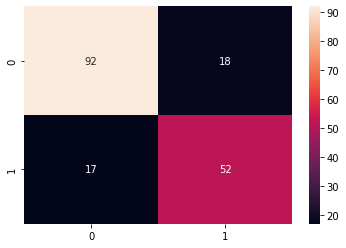

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.75        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



# New Section